In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *


In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('/home/renatochaz/git/economic_policy_uncertainty/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
ds = pd.read_csv(f'{module_path}/global.csv')

### INV x EPU

In [161]:
inv = ds.copy()
inv = inv.groupby(['ano'], as_index=False).agg({'inv':'mean'})

In [162]:
epu = ds.copy()
epu = epu.groupby(['ano'], as_index=False).agg({'ln_epu':'mean'})
pds = inv.join(epu['ln_epu'])

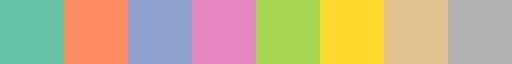

In [173]:
cmap

In [164]:
cmap = cm.get_cmap('Set2')
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#66c2a5
#fc8d62
#8da0cb
#e78ac3
#a6d854
#ffd92f
#e5c494
#b3b3b3


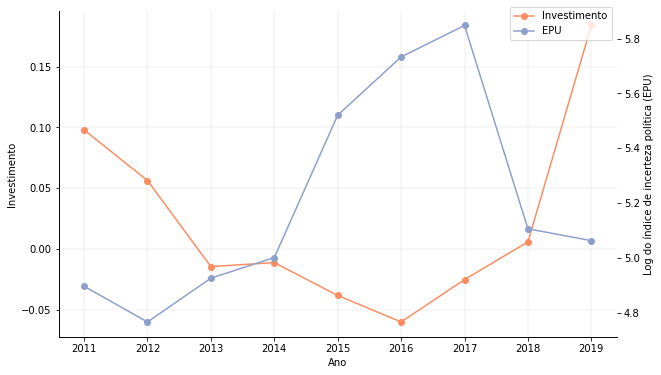

In [175]:
ax = pds.plot(
    x='ano',
    y='inv',
    legend=False,
    label='Investimento',
    marker='o',
    color='#fc8d62'
    )
ax.set(
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='ln_epu',
    ax=ax2,
    legend=False,
    marker='o',
    color='#8da0cb', 
    figsize=(10,6),
    label='EPU'
    )
ax.figure.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.9, 0.9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log do índice de incerteza política (EPU)')
plt.show()

### INV x IIE-BR

In [176]:
iie = ds.copy()

In [177]:
iie['iee'] = np.log(iie['iee'])
iie = iie.groupby(['ano'], as_index=False).agg({'iee':'mean'})
pds = inv.join(iie['iee'])

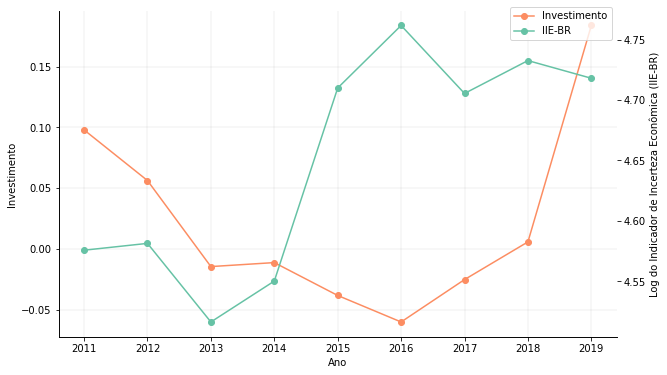

In [178]:
ax = pds.plot(
    x='ano',
    y='inv',
    legend=False,
    label='Investimento',
    marker='o',
    color='#fc8d62'
    )
ax.set(
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='iee',
    ax=ax2,
    legend=False,
    marker='o',
    color='#66c2a5', 
    figsize=(10,6),
    label='IIE-BR'
    )
ax.figure.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.9, 0.9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log do Indicador de Incerteza Econômica (IIE-BR)')
plt.show()

### INV x Financial constraint X FC

In [199]:
inv_cons = ds.copy()
inv_un = ds.copy()

In [200]:
kz_cons = inv_cons[inv_cons['dum_kz'] == 1]
ks_un = inv_un[inv_un['dum_kz'] == 0]

kz_cons = kz_cons.groupby(['ano'], as_index=False).agg({'inv':'mean', 'fc':'mean', 'tamanho':'mean', 'dum_kz': 'first'})
ks_un = ks_un.groupby(['ano'], as_index=False).agg({'inv':'mean', 'fc':'mean', 'tamanho':'mean', 'dum_kz': 'first'})
inv_res = pd.concat([kz_cons, ks_un])
inv_res['restricao'] = ['KZ Restritas','KZ Restritas','KZ Restritas','KZ Restritas',
'KZ Restritas','KZ Restritas','KZ Restritas','KZ Restritas','KZ Restritas','KZ Não Restritas','KZ Não Restritas','KZ Não Restritas',
'KZ Não Restritas','KZ Não Restritas','KZ Não Restritas','KZ Não Restritas','KZ Não Restritas','KZ Não Restritas']

In [201]:
ww_cons = inv_cons[inv_cons['dum_ww'] == 1]
ww_un = inv_un[inv_un['dum_ww'] == 0]

ww_cons = ww_cons.groupby(['ano'], as_index=False).agg({'inv':'mean', 'fc':'mean','tamanho':'mean', 'dum_ww': 'first'})
ww_un = ww_un.groupby(['ano'], as_index=False).agg({'inv':'mean', 'fc':'mean', 'tamanho':'mean','dum_ww': 'first'})
ww_res = pd.concat([ww_cons, ww_un], axis=0)
ww_res['restricao'] = ['WW Restritas','WW Restritas','WW Restritas','WW Restritas',
'WW Restritas','WW Restritas','WW Restritas','WW Restritas','WW Restritas','WW Não Restritas','WW Não Restritas','WW Não Restritas',
'WW Não Restritas','WW Não Restritas','WW Não Restritas','WW Não Restritas','WW Não Restritas','WW Não Restritas']

In [202]:
fcp_cons = inv_cons[inv_cons['dum_fcp'] == 1]
fcp_un = inv_un[inv_un['dum_fcp'] == 0]

fcp_cons = fcp_cons.groupby(['ano'], as_index=False).agg({'inv':'mean', 'fc':'mean', 'tamanho':'mean','dum_fcp': 'first'})
fcp_un = fcp_un.groupby(['ano'], as_index=False).agg({'inv':'mean', 'fc':'mean', 'tamanho':'mean','dum_fcp': 'first'})
fcp_res = pd.concat([fcp_cons, fcp_un], axis=0)
fcp_res['restricao'] = ['FCP Restritas','FCP Restritas','FCP Restritas','FCP Restritas',
'FCP Restritas','FCP Restritas','FCP Restritas','FCP Restritas','FCP Restritas','FCP Não Restritas','FCP Não Restritas','FCP Não Restritas',
'FCP Não Restritas','FCP Não Restritas','FCP Não Restritas','FCP Não Restritas','FCP Não Restritas','FCP Não Restritas']

In [203]:
inv_res = pd.concat([inv_res, ww_res, fcp_res])
inv_res.reset_index(inplace=True)


In [204]:
inv_test = inv_res.copy()
inv_test['restricao'] = ['Sim'] * 9 + ['Não'] * 9 + ['Sim'] * 9 + ['Não'] * 9 + ['Sim'] * 9 + ['Não'] * 9

In [205]:
inv_test['ind'] = ['Índice KZ'] * 18 + ['Índice WW'] * 18 + ['Índice SA'] * 18 

In [207]:
inv_test.columns = ['index', 'Ano', 'Investimento', 'Fluxo de Caixa', 'Tamanho', 'kz', 'Restrição Financeira', 'ww', 'fcp', 'Índice de Restrição Financeira']

In [208]:
inv_test.head()

,index,Ano,Investimento,Fluxo de Caixa,Tamanho,kz,Restrição Financeira,ww,fcp,Índice de Restrição Financeira
0,0,2011,0.066241,0.244600,21.828985,1.0,Sim,NaN,NaN,Índice KZ
1,1,2012,0.025543,0.301911,21.773070,1.0,Sim,NaN,NaN,Índice KZ
2,2,2013,-0.045068,0.299412,21.723489,1.0,Sim,NaN,NaN,Índice KZ
3,3,2014,-0.046155,0.369398,21.771557,1.0,Sim,NaN,NaN,Índice KZ
4,4,2015,-0.068155,0.369800,21.737020,1.0,Sim,NaN,NaN,Índice KZ


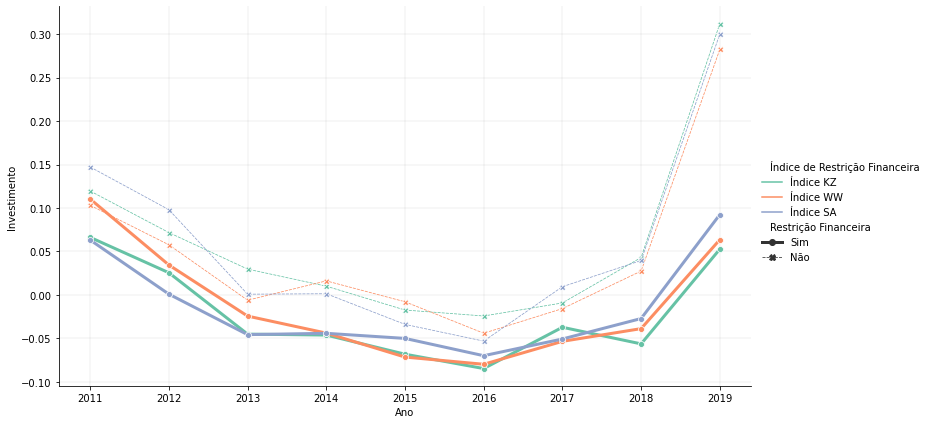

In [209]:
sns.relplot(
    data=inv_test, kind='line',
    x='Ano', y='Investimento',
    hue='Índice de Restrição Financeira', style='Restrição Financeira',
    size='Restrição Financeira', palette='Set2',
    legend='brief', markers=True,
    aspect=1.8, height=6,
    facet_kws=dict(sharex=False))
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

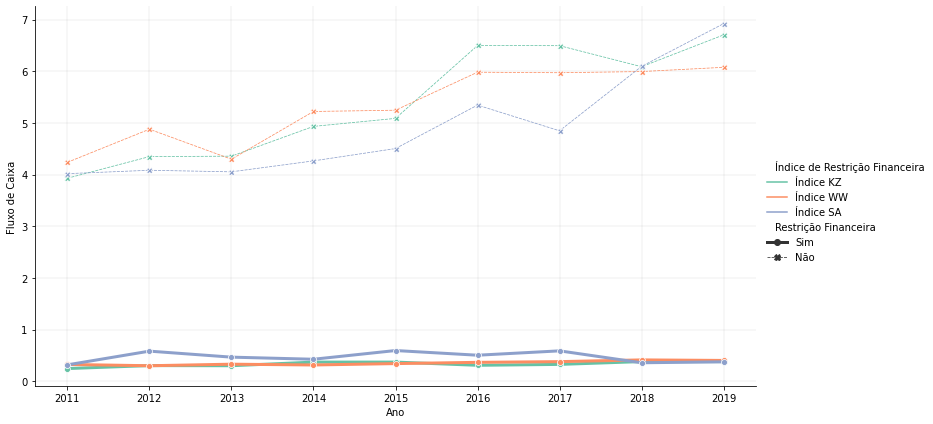

In [210]:
sns.relplot(
    data=inv_test, kind='line',
    x='Ano', y='Fluxo de Caixa',
    hue='Índice de Restrição Financeira', style='Restrição Financeira',
    size='Restrição Financeira', palette='Set2',
    legend='brief', markers=True,
    aspect=1.8, height=6,
    facet_kws=dict(sharex=False))
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()